In [1]:
import math, time
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv', delimiter=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# from sklearn.preprocessing import MinMaxScaler
# data = df 
# scaler = MinMaxScaler()
# print(scaler.fit(data))
# ('\n')
# print(scaler.data_max_)
# ('\n')
# print(scaler.transform(data))


In [5]:
df.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6278,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10574,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8348,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41168,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31905,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24661,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4655,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39356,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 785)

In [8]:
pd.value_counts(df.dtypes)

int64    785
dtype: int64

In [9]:
df.label.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='Count'>

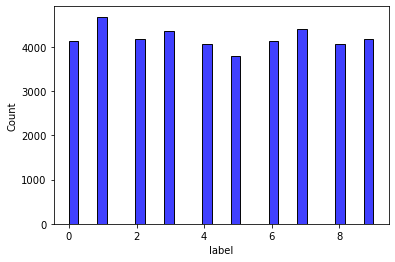

In [10]:
plt.figure()
sns.histplot(df.label, color="blue")

In [11]:
#import seaborn as sn

#print(df.corr())
#corrMatrix = df.corr()
#sn.heatmap(corrMatrix, annot=True)
#plt.show()

# Ne fonctionne pas en raison du trop grand nombre de données 

In [12]:
#df.plot(lw=0,
          #marker=".",
          #subplots=True,
          #layout=(-1, 4),
          #figsize=(15, 30),
          #markersize=1);

# Les visuels des graphiques sont illisibles 

In [13]:
correlation = df.corr()

<AxesSubplot:>

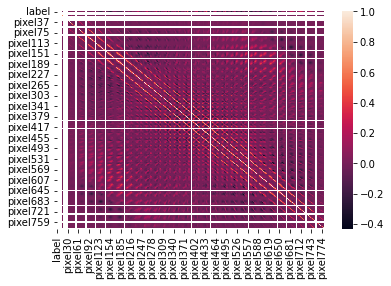

In [14]:
sns.heatmap(correlation)

# La matrice de corrélation 

In [15]:
X = df.loc[:,df.columns != 'label'].copy()
y = df.label

In [16]:
# Standardisation des données
from sklearn import preprocessing
# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)
scaler=preprocessing.StandardScaler()
scaler.fit_transform(X)
# Créer un SVM avec un noyau (kernel) gaussien de paramètre gamma = 0.01


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [18]:
print(y_test.value_counts())
print(y_train.value_counts())

1    1177
3    1084
7    1073
0    1065
2    1057
8    1045
9    1035
6    1026
4    1024
5     914
Name: label, dtype: int64
1    3507
7    3328
3    3267
9    3153
2    3120
6    3111
0    3067
4    3048
8    3018
5    2881
Name: label, dtype: int64


In [19]:
y_train.shape , y_test.shape

((31500,), (10500,))

In [20]:
#from sklearn.svm import SVC

#steps = [('scaler', MinMaxScaler()), ('SVM', SVC(kernel='poly'))]
#pipeline = Pipeline(steps)

In [21]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF

#kernel = 1.0 * RBF(1.0)
#gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X_test, y_test)

In [22]:
from sklearn import svm 
classifier = svm.SVC(kernel='rbf')

# Entraîner la SVM sur le jeu d'entraînement (SVM représente des algorithmes d'apprentissages de ML pour la classification/régression 
# et détection d'anomalie)
classifier.fit(X_train, y_train)

SVC()

In [23]:
# Faire la prédiction du modèle
from sklearn.multioutput import MultiOutputClassifier

y_test_pred = classifier.predict(X_test)

In [30]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_test_pred)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1065
           1       0.99      0.99      0.99      1177
           2       0.98      0.98      0.98      1057
           3       0.98      0.96      0.97      1084
           4       0.97      0.98      0.97      1024
           5       0.97      0.97      0.97       914
           6       0.98      0.99      0.98      1026
           7       0.98      0.98      0.98      1073
           8       0.98      0.97      0.98      1045
           9       0.97      0.96      0.96      1035

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



In [31]:
# Matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cf=confusion_matrix(y_test, y_test_pred)

<function classification_report at 0x000001A8A452A430>


<AxesSubplot:>

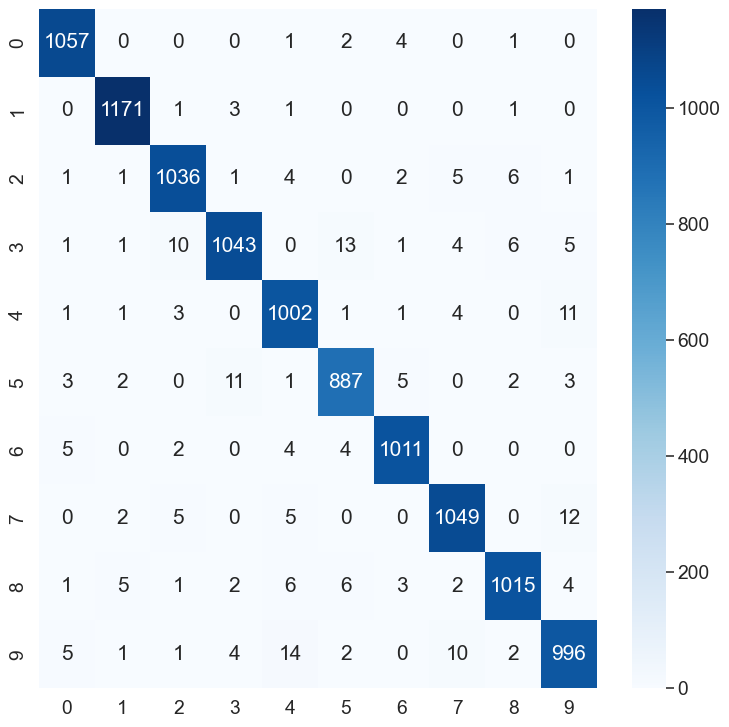

In [28]:
import seaborn as sns 

plt.figure(figsize=(10,10),dpi=90)

sns.set(font_scale=1.4)

sns.heatmap(cf, annot=True,fmt='g', cmap='Blues')

In [ ]:
# GridsearchCV



In [26]:
# Courbe ROC
# from sklearn import metrics
# fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# auc = metrics.auc(fpr, tpr)

# fig = plt.figure(figsize=(6, 6))

# plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('SVM ROC Curve', fontsize=16)

# plt.legend(loc="lower right", fontsize=14)

# plt.show()